Usa Housing Prediction 

In [84]:
# importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression, RidgeCV,LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [ ]:
# loading of the dataset and looking at the first 5 rows 
housing = pd.read_csv(r'C:\\Users\\Nullvoid\\Desktop\\usa_housing.csv')
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# the last 5 rows 
housing.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1060193.786,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1482617.729,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1030729.583,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1198656.872,USS Wallace\nFPO AE 73316
4999,65510.58180,5.992305,6.792336,4.07,46501.28380,1298950.480,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
# getting the info of the dataset 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
# the describing of the dataset 
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [8]:
# looking of the missing values 
housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
# looking for duplicates in the dataset 
housing.duplicated().sum()

0

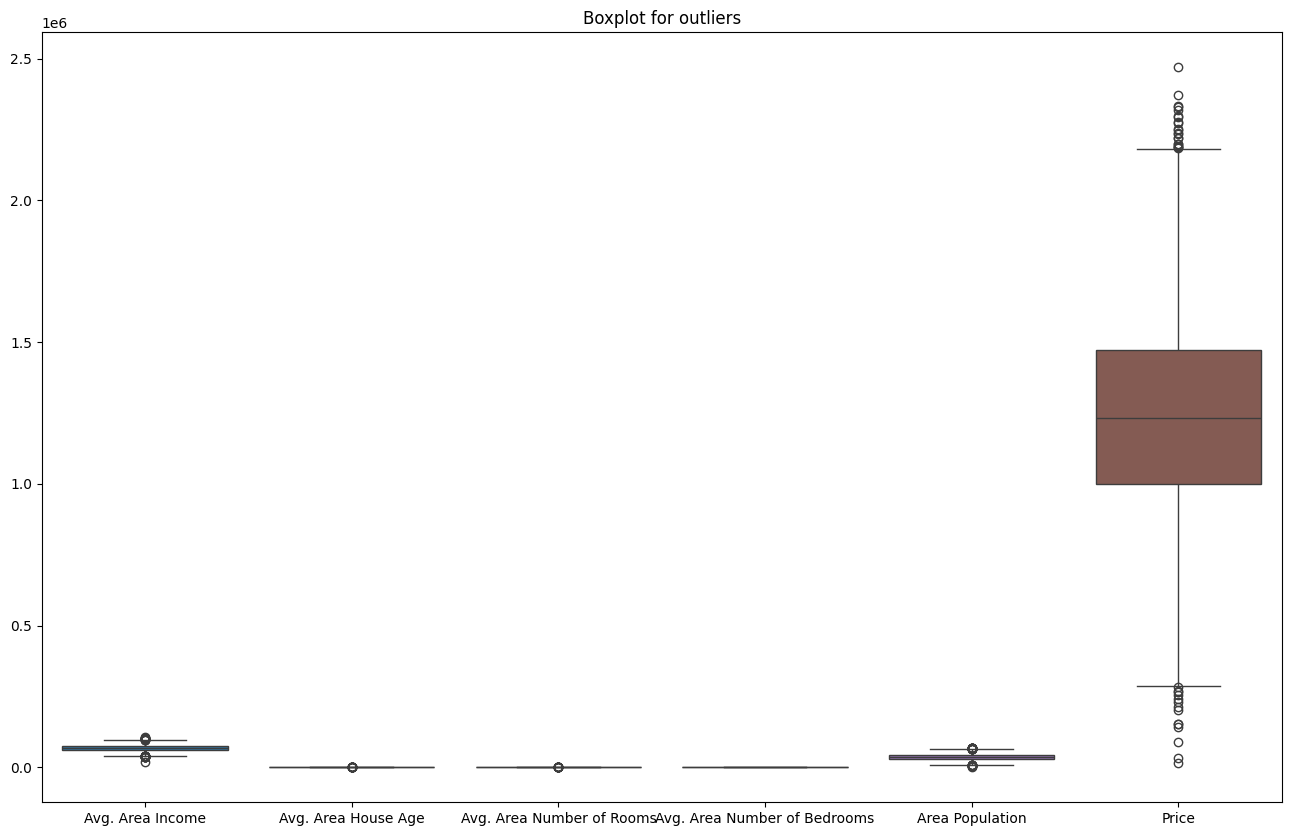

In [13]:
# looking for outliers 
plt.figure(figsize = (16,10))
sns.boxplot(data = housing)
plt.title('Boxplot for outliers')
plt.show()

In [30]:
# replacing the outliers with the median value 
for column in housing.select_dtypes(include=['float64', 'int64']).columns:
    median = housing[column].median()
    q1 = housing[column].quantile(0.25)
    q3 = housing[column].quantile(0.75)
    iqr = q3 -q1
    lower_bound = q1 -1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    housing.loc[(housing[column] < lower_bound) | (housing[column] > upper_bound), column] = median

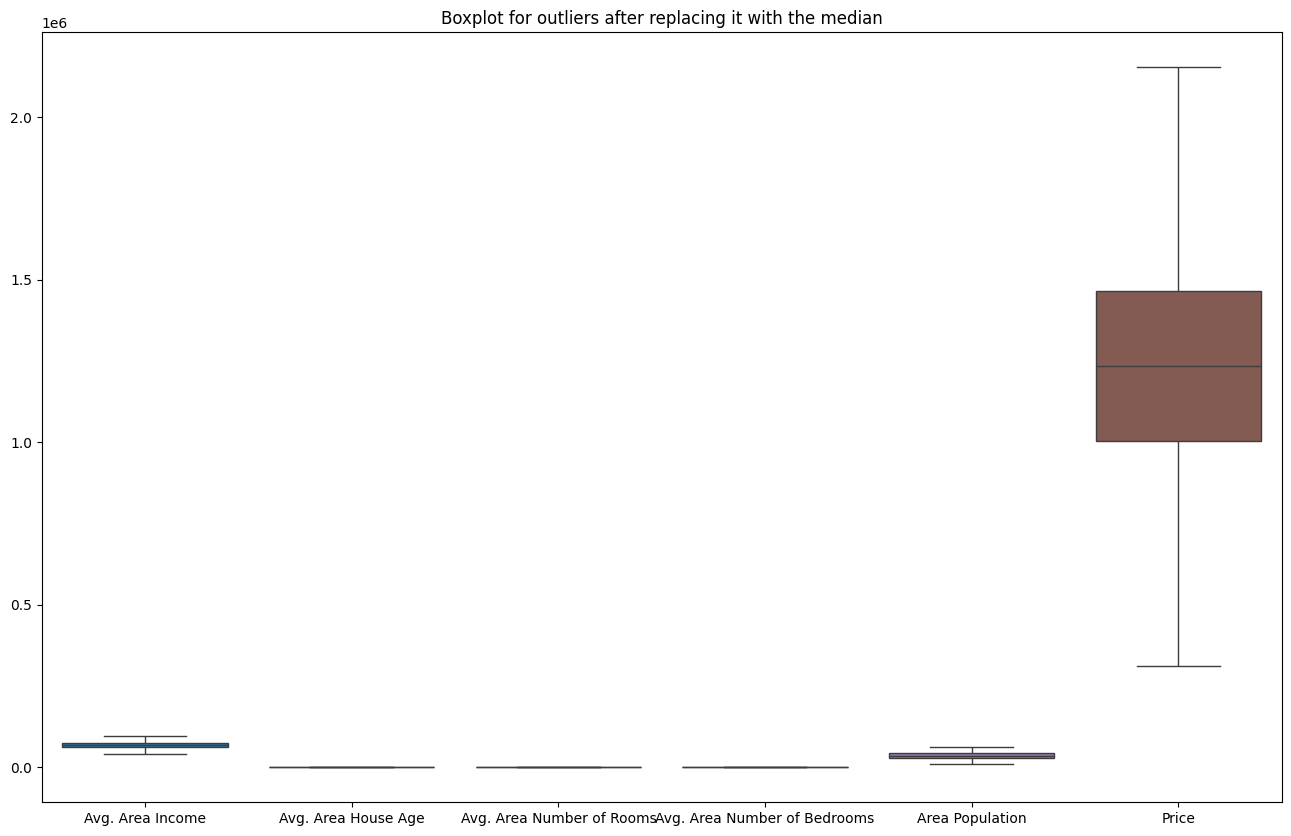

In [31]:
plt.figure(figsize = (16,10))
sns.boxplot(data = housing)
plt.title('Boxplot for outliers after replacing it with the median')
plt.show()

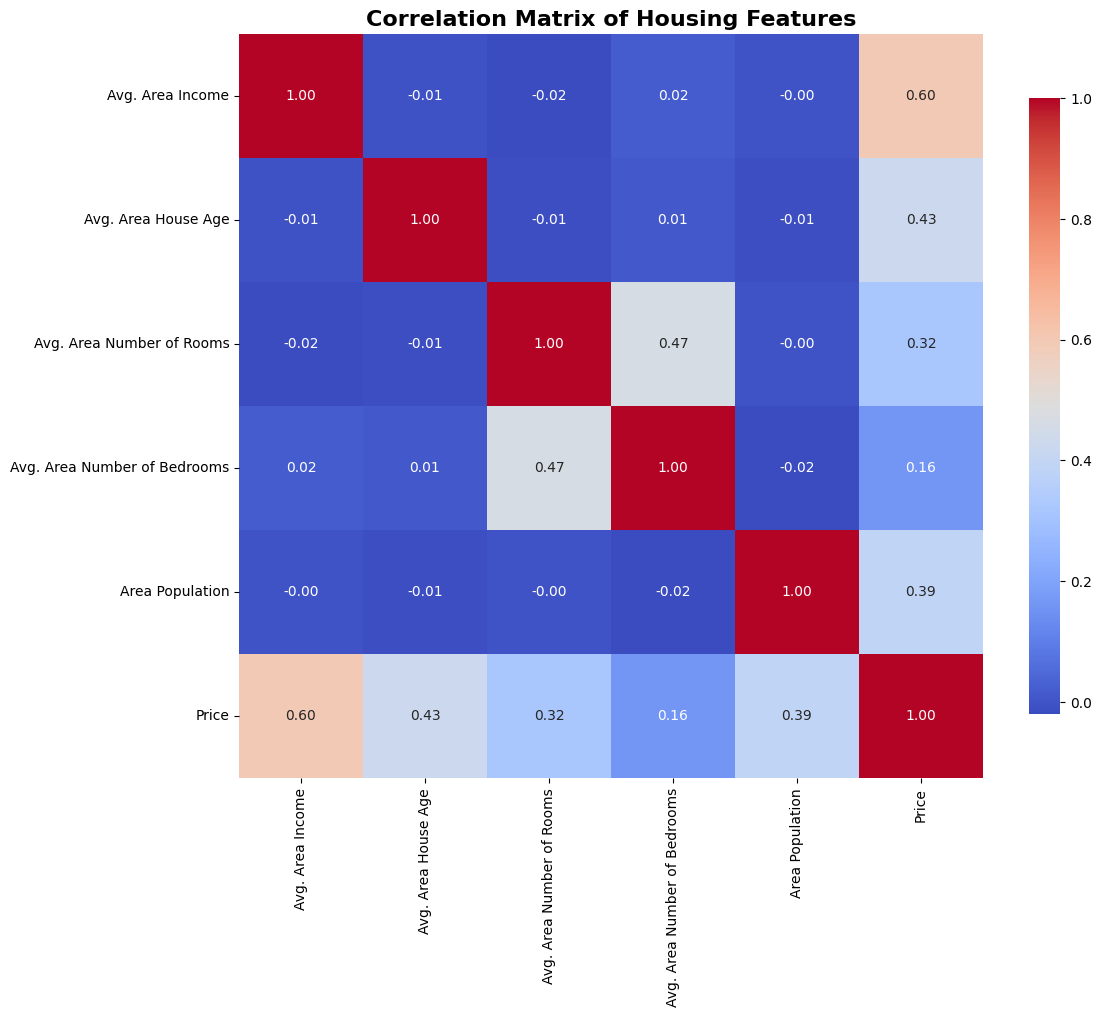

In [32]:
# feature engineering 
# Correlation Analysis
plt.figure(figsize=(12, 10))
correlation_matrix = housing.drop(columns=['Address']).corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Housing Features', fontsize=16, fontweight='bold')
plt.show()

In [33]:
X = housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
Y = housing ['Price']
X
Y


0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [56]:
print("training set size: ", len(X_train))
print("test set size: ", len(X_test))

training set size:  4000
test set size:  1000


In [58]:
# training the model 
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
# making of the predictions 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [100]:
# calculating the metrics
train_mae_housing = mean_absolute_error(y_train, y_train_pred)
train_mse_housing = mean_squared_error(y_train, y_train_pred)
train_rsme_housing = np.sqrt(mse_housing)
train_r2_housing = r2_score(y_train, y_train_pred)
print(f"training metrics")
print(f"mae_housing: {mae_housing:.2f}")
print(f"mse_housing: {mse_housing:.2f}")
print(f"rsme_housing: {rsme_housing:.2f}")
print(f"r2_housing: {r2_housing:.2f}")



training metrics
mae_housing: 93573.66
mse_housing: 19201660561.26
rsme_housing: 138570.06
r2_housing: 0.83


In [101]:
# calculating the metrics
test_mae_housing = mean_absolute_error(y_test, y_test_pred)
test_mse_housing = mean_squared_error(y_test, y_test_pred)
test_rsme_housing = np.sqrt(mse_housing)
test_r2_housing = r2_score(y_test, y_test_pred)
print(f"testing metrics")
print(f"mae_housing: {mae_housing:.2f}")
print(f"mse_housing: {mse_housing:.2f}")
print(f"rsme_housing: {rsme_housing:.2f}")
print(f"r2_housing: {r2_housing:.2f}")



testing metrics
mae_housing: 93573.66
mse_housing: 19201660561.26
rsme_housing: 138570.06
r2_housing: 0.83


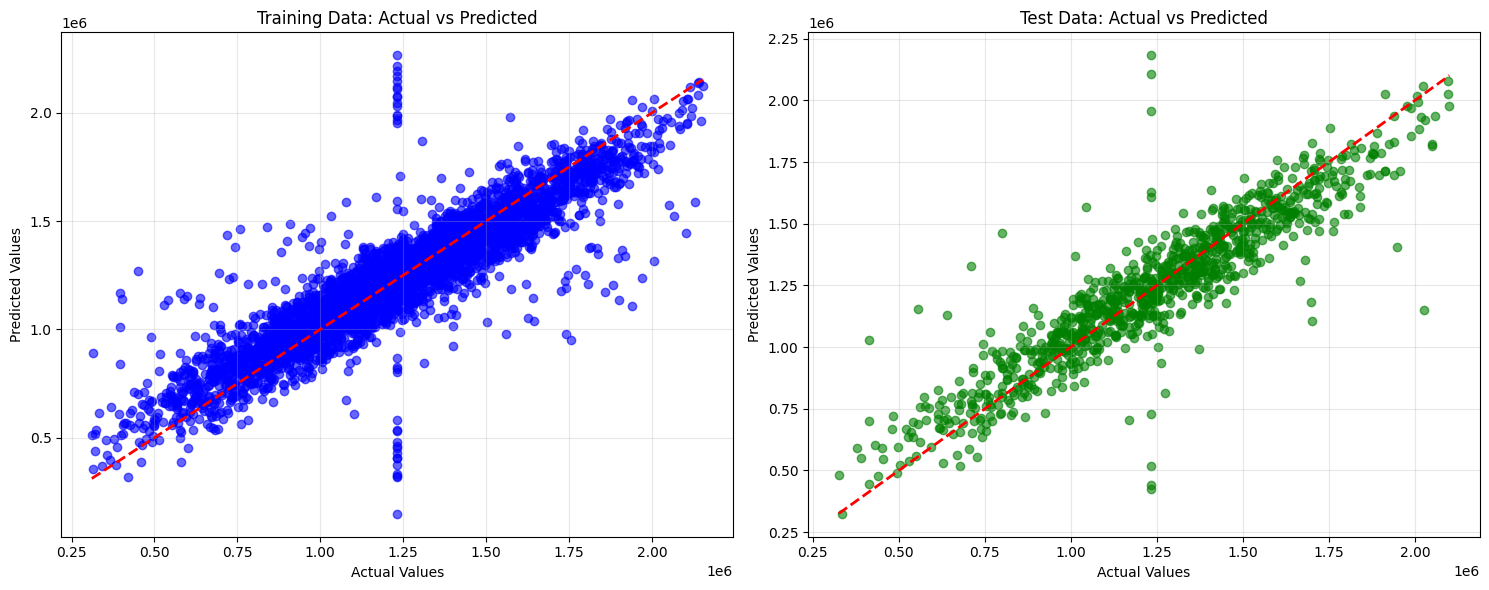

In [73]:
# Create subplots for training and test data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training data scatter plot
ax1.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Training Data: Actual vs Predicted')
ax1.grid(True, alpha=0.3)

# Test data scatter plot
ax2.scatter(y_test, y_test_pred, alpha=0.6, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Test Data: Actual vs Predicted')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [76]:
# ridge regression and training the model
# use RidgeCV with a list of candidate alphas
ridge_model = RidgeCV(alphas=[1.0])
ridge_model.fit(X_train, y_train)

# optional: get predictions for train and test sets
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

In [82]:
# comparing ridge and linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# compare coefficients using the .coef_ attributes and map to feature names
lin_coef = pd.Series(linear_model.coef_, index=X.columns)
ridge_coef = pd.Series(ridge_model.coef_, index=X.columns)

print("Linear Regression Coefficients:\n", lin_coef)
print("\nRidge Regression Coefficients:\n", ridge_coef)

# optional: show intercepts
print("\nLinear intercept:", linear_model.intercept_)
print("Ridge intercept:", ridge_model.intercept_)

Linear Regression Coefficients:
 Avg. Area Income                    20.224711
Avg. Area House Age             153241.069122
Avg. Area Number of Rooms       113746.361507
Avg. Area Number of Bedrooms      1679.204183
Area Population                     13.892918
dtype: float64

Ridge Regression Coefficients:
 Avg. Area Income                    20.223099
Avg. Area House Age             153199.384262
Avg. Area Number of Rooms       113707.855814
Avg. Area Number of Bedrooms      1693.627056
Area Population                     13.892220
dtype: float64

Linear intercept: -2375679.1457216786
Ridge intercept: -2375082.8422629386


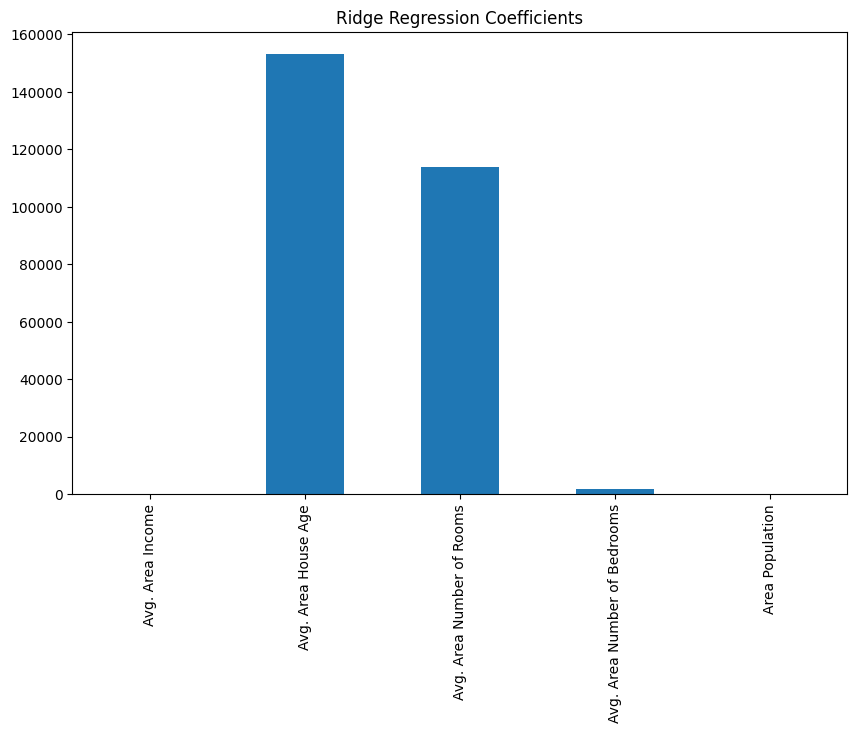

In [88]:
# visualization of ridge regression 
plt.figure(figsize=(10,6))
ridge_coef.plot(kind='bar')
plt.title('Ridge Regression Coefficients')
plt.show()

In [85]:
# lasso regression and training the model 
lasso_model = LassoCV(alphas=[1.0])
lasso_model.fit(X_train, y_train)
# optional: get predictions for train and test sets
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

In [86]:
# comparing ridge and linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# compare coefficients using the .coef_ attributes and map to feature names
lin_coef = pd.Series(linear_model.coef_, index=X.columns)
lasso_coef = pd.Series(lasso_model.coef_, index=X.columns)

print("Linear Regression Coefficients:\n", lin_coef)
print("\nLasso Regression Coefficients:\n", lasso_coef)

# optional: show intercepts
print("\nLinear intercept:", linear_model.intercept_)
print("Lasso intercept:", lasso_model.intercept_)

Linear Regression Coefficients:
 Avg. Area Income                    20.224711
Avg. Area House Age             153241.069122
Avg. Area Number of Rooms       113746.361507
Avg. Area Number of Bedrooms      1679.204183
Area Population                     13.892918
dtype: float64

Lasso Regression Coefficients:
 Avg. Area Income                    20.224710
Avg. Area House Age             153239.989536
Avg. Area Number of Rooms       113745.508820
Avg. Area Number of Bedrooms      1678.865122
Area Population                     13.892915
dtype: float64

Linear intercept: -2375679.1457216786
Lasso intercept: -2375665.220719969


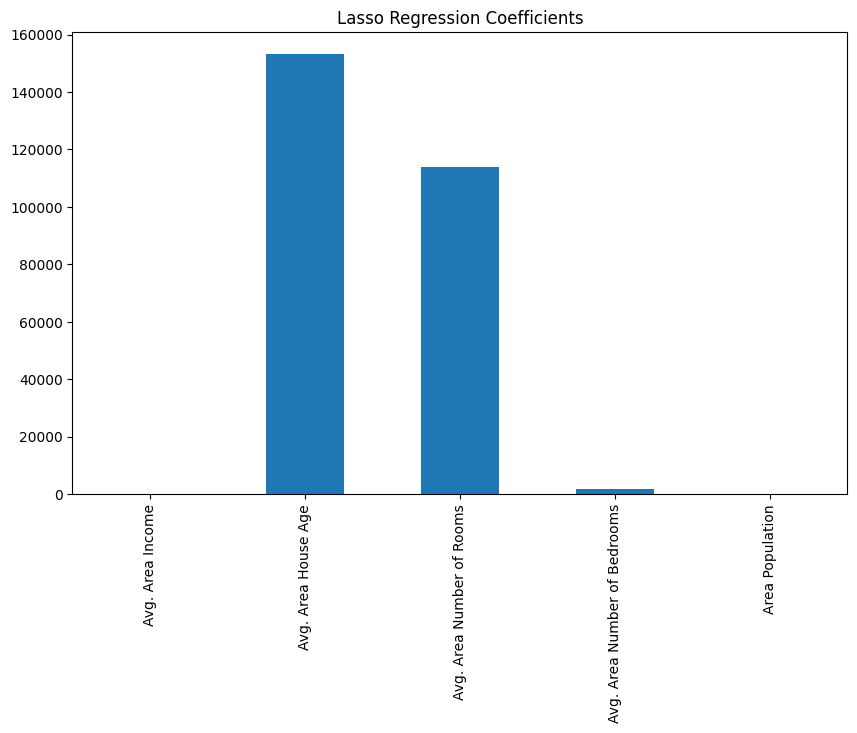

In [87]:
# visualization of lasso regression coefficients
plt.figure(figsize=(10,6))
lasso_coef.plot(kind='bar')
plt.title('Lasso Regression Coefficients')
plt.show()

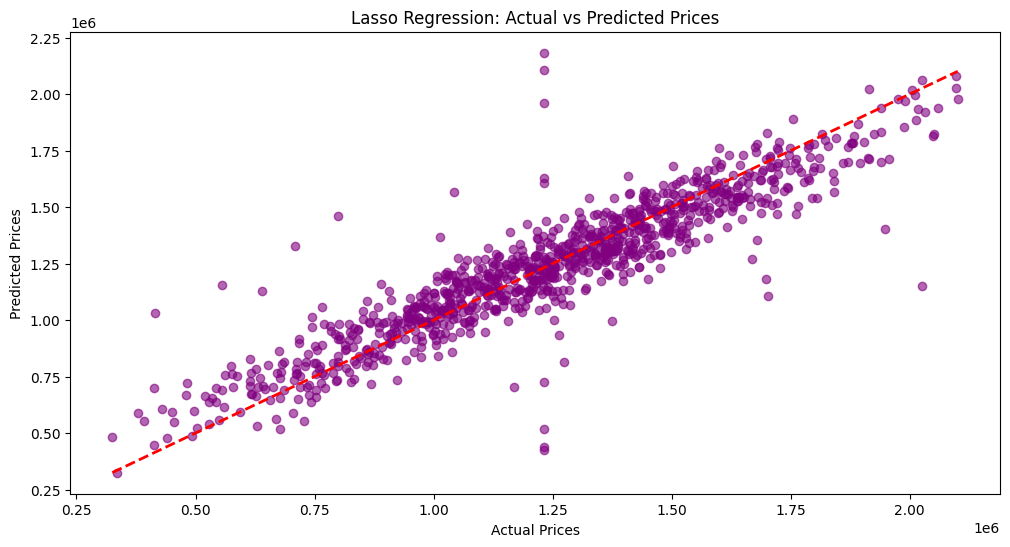

In [90]:
# compare the actual price vs predicted price for lasso regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred_lasso, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Lasso Regression: Actual vs Predicted Prices')
plt.show()

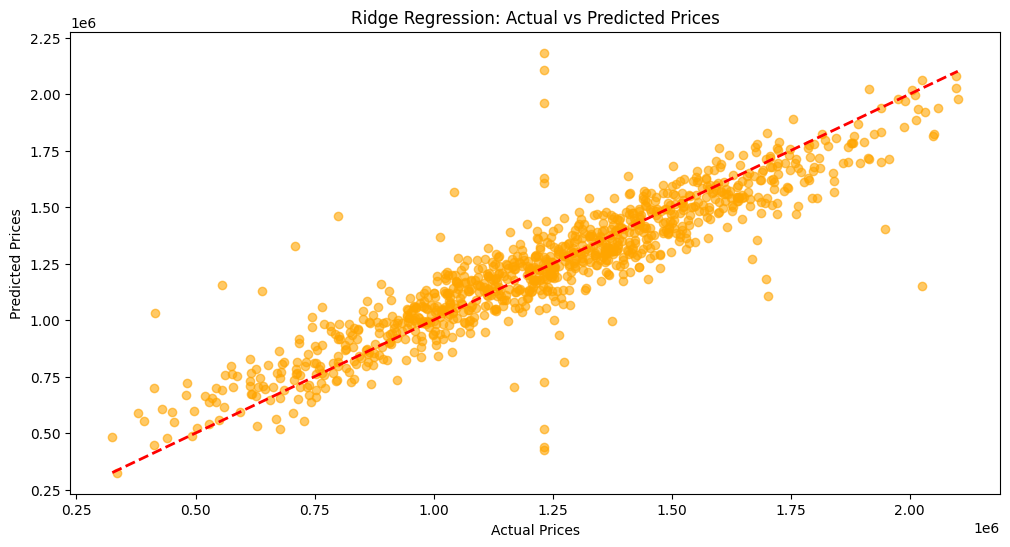

In [91]:
# comparing ridge and the actual price vs predicted price for ridge regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred_ridge, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.show()

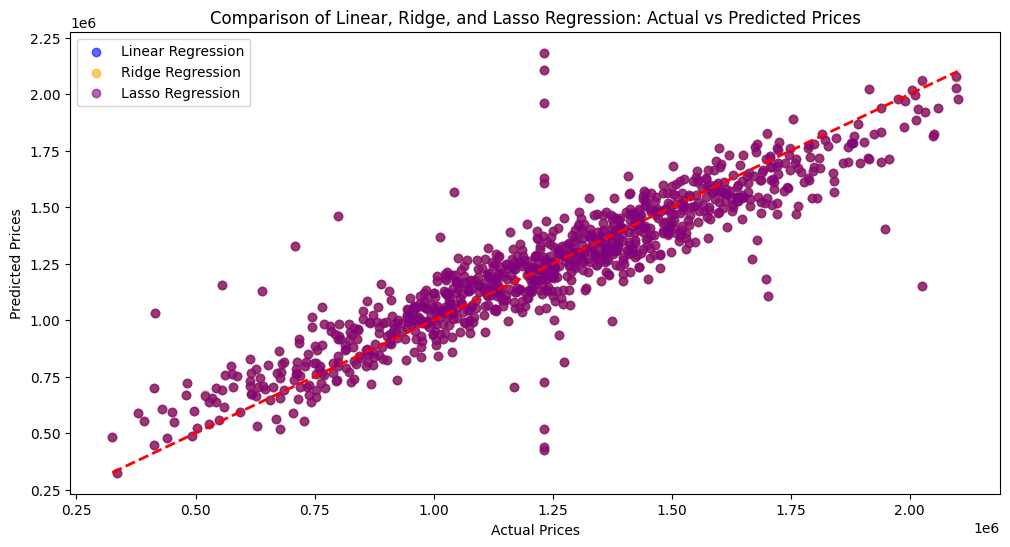

In [92]:
# comparing lasso, ridge and linear 
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label='Linear Regression')
plt.scatter(y_test, y_test_pred_ridge, alpha=0.6, color='orange', label='Ridge Regression')
plt.scatter(y_test, y_test_pred_lasso, alpha=0.6, color='purple', label='Lasso Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Linear, Ridge, and Lasso Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()

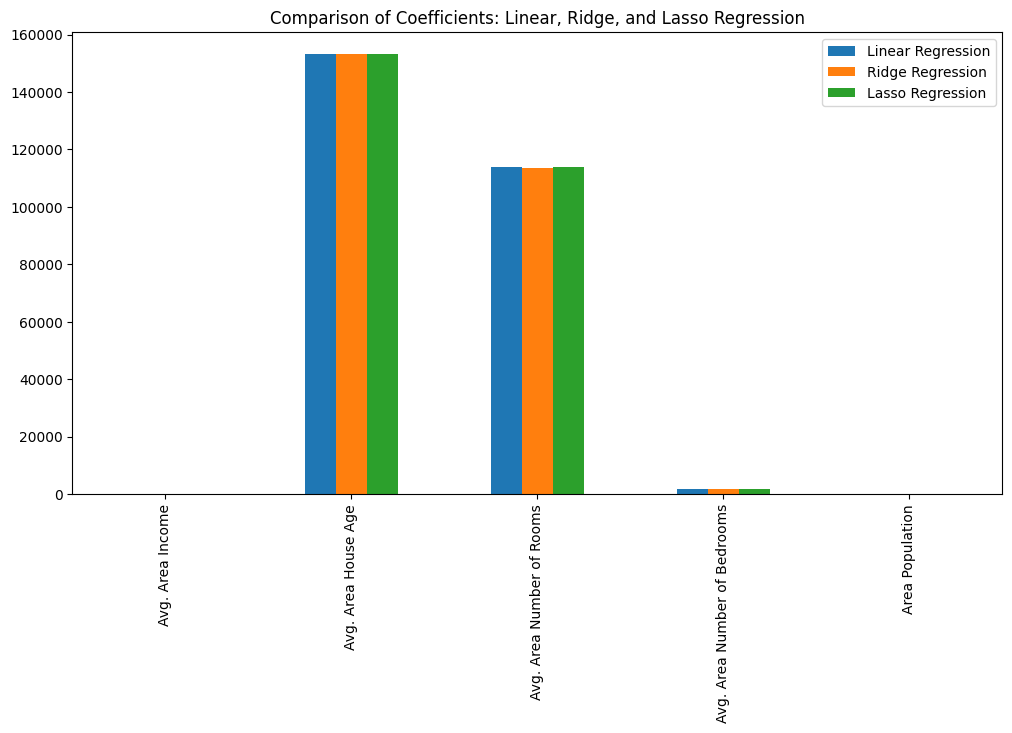

In [93]:
# comaparing the coefficients of all three models
coef_df = pd.DataFrame({
    'Linear Regression': lin_coef,
    'Ridge Regression': ridge_coef,
    'Lasso Regression': lasso_coef
})
coef_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Coefficients: Linear, Ridge, and Lasso Regression')
plt.show()

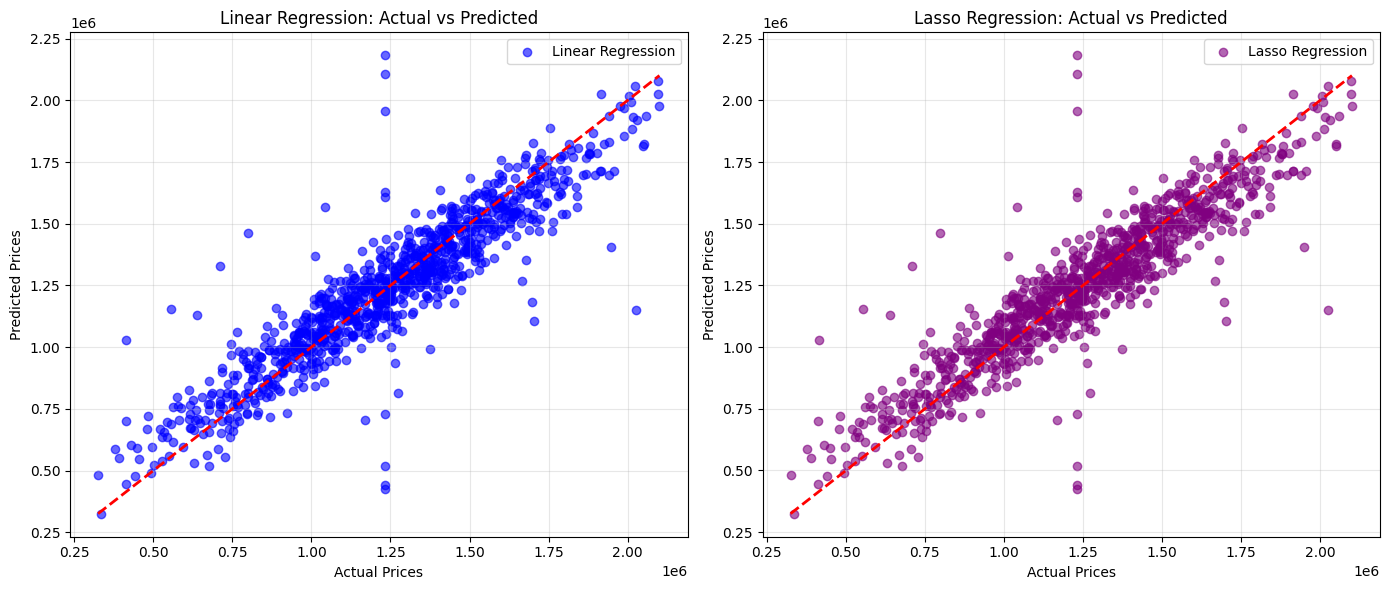

In [97]:
# ...existing code...
# comparing lasso and linear regression in separate graphs (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Linear
ax1.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label='Linear Regression')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Prices')
ax1.set_ylabel('Predicted Prices')
ax1.set_title('Linear Regression: Actual vs Predicted')
ax1.legend()
ax1.grid(alpha=0.3)

# Lasso
ax2.scatter(y_test, y_test_pred_lasso, alpha=0.6, color='purple', label='Lasso Regression')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Prices')
ax2.set_ylabel('Predicted Prices')
ax2.set_title('Lasso Regression: Actual vs Predicted')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


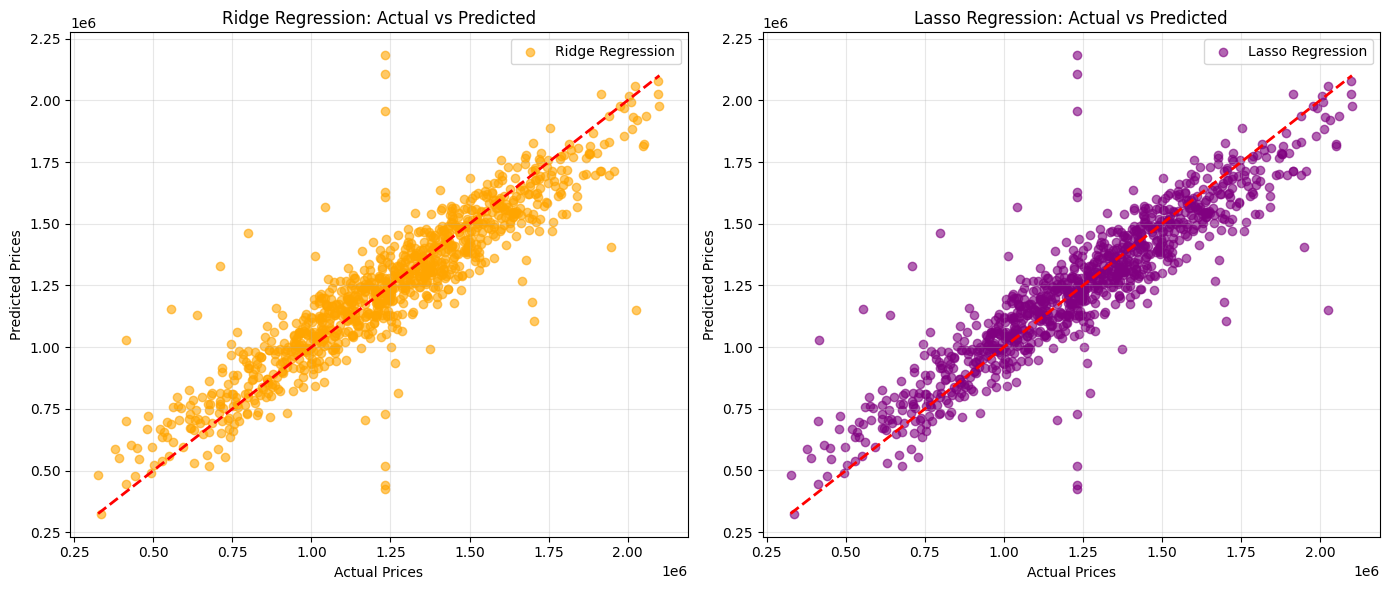

In [98]:
# ...existing code...
# comparing lasso and linear regression in separate graphs (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Ridge
ax1.scatter(y_test, y_test_pred_ridge, alpha=0.6, color='orange', label='Ridge Regression')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Prices')
ax1.set_ylabel('Predicted Prices')
ax1.set_title('Ridge Regression: Actual vs Predicted')
ax1.legend()
ax1.grid(alpha=0.3)

# Lasso
ax2.scatter(y_test, y_test_pred_lasso, alpha=0.6, color='purple', label='Lasso Regression')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Prices')
ax2.set_ylabel('Predicted Prices')
ax2.set_title('Lasso Regression: Actual vs Predicted')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


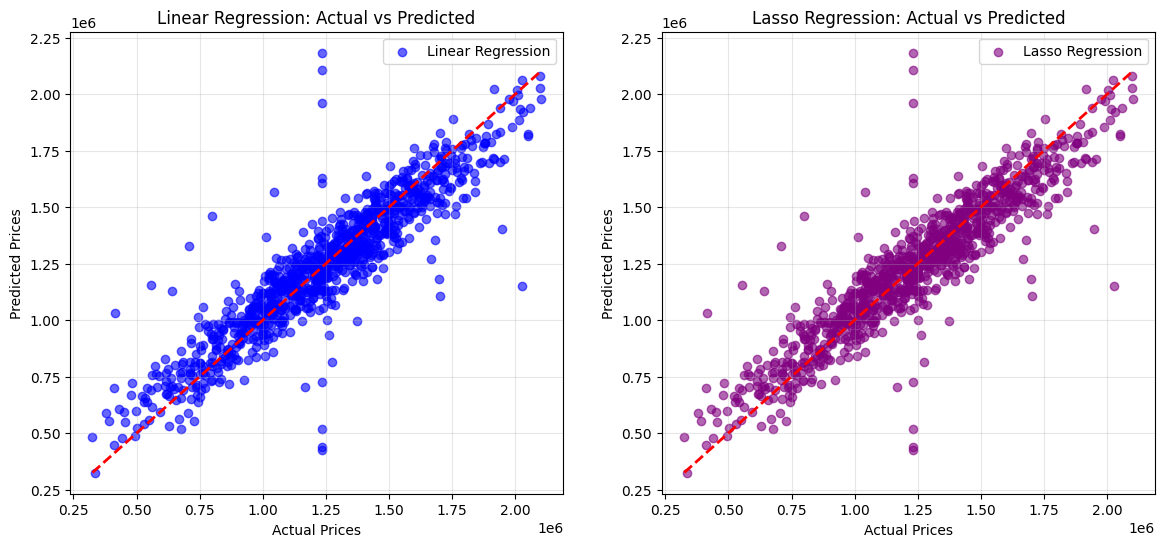

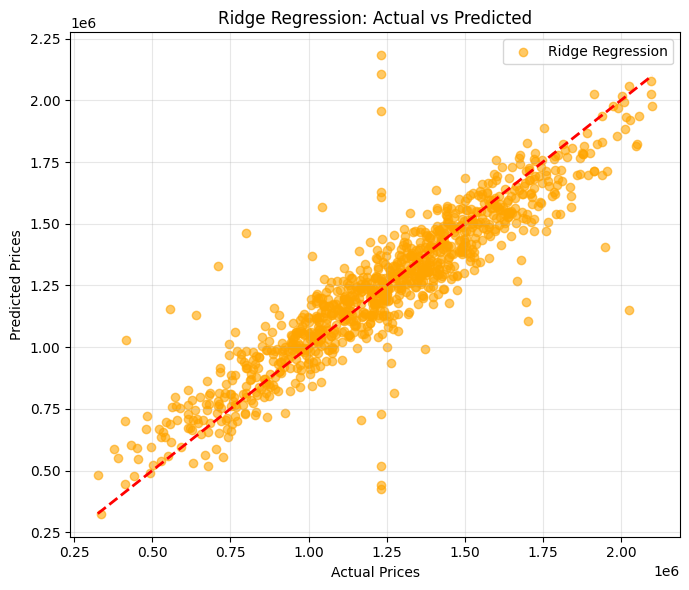

In [99]:
# ...existing code...
# comparing lasso and linear regression in separate graphs (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Linear
ax1.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label='Linear Regression')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Prices')
ax1.set_ylabel('Predicted Prices')
ax1.set_title('Linear Regression: Actual vs Predicted')
ax1.legend()
ax1.grid(alpha=0.3)

# Lasso
ax2.scatter(y_test, y_test_pred_lasso, alpha=0.6, color='purple', label='Lasso Regression')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Prices')
ax2.set_ylabel('Predicted Prices')
ax2.set_title('Lasso Regression: Actual vs Predicted')
ax2.legend()
ax2.grid(alpha=0.3)

# Ridge
fig, ax3 = plt.subplots(1, 1, figsize=(7, 6))
ax3.scatter(y_test, y_test_pred_ridge, alpha=0.6, color='orange', label='Ridge Regression')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Prices')
ax3.set_ylabel('Predicted Prices')
ax3.set_title('Ridge Regression: Actual vs Predicted')
ax3.legend()
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [102]:
import joblib
joblib.dump(model, "housing_model.pkl")


['housing_model.pkl']